# Linear regression
 - In this section I carry out a linear regression using some numerical features given in the data

In [41]:
# Import all the libraries you need.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # this for splitting the data into training and testing set.
from sklearn.linear_model import LinearRegression # For linear regression model.

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from numpy.linalg import multi_dot
from scipy import stats
import statistics

from scipy.stats import multivariate_normal

In [42]:
test_df = pd.read_excel('test_data.xlsx') #  Assign the excel data to test_df
test_df

,channel_id,video_id,published_at,conversions,views,conversion_rate,subscribers,median_past_views,median_past_views_per_subscriber,median_past_comments,median_past_comments_per_view,median_past_likes_per_dislike,median_past_likes_per_view,average_retention
0,channel_0,video_0,2019-09-28 13:00:00+00:00,64,242887,2.635011e-04,176000,243186.5,1.381741,623.0,0.002165,30.125136,0.026371,1.406284
1,channel_0,video_1,2020-03-07 14:00:10+00:00,35,135413,2.584759e-04,176000,81016.5,0.460321,402.0,0.003693,29.574542,0.038801,1.406284
2,channel_1,video_2,2019-07-26 14:00:00+00:00,41,94210,4.352086e-04,497000,890437.5,1.791625,1969.5,0.002393,28.074815,0.026864,1.259188
3,channel_2,video_3,2019-07-31 07:00:02+00:00,38,69479,5.469422e-04,348000,98262.5,0.282364,275.0,0.004391,22.723902,0.025438,1.295581
4,channel_3,video_4,2020-01-10 16:59:26+00:00,1,96465,1.037682e-05,353000,110008.0,0.311637,660.5,0.006008,40.354157,0.036893,1.175611
5,channel_4,video_5,2020-01-13 16:23:43+00:00,6,140190,4.280619e-05,123000,75178.5,0.611207,610.5,0.008723,32.774610,0.043812,1.404036
6,channel_4,video_6,2020-07-13 15:06:08+00:00,8,218400,3.663462e-05,123000,42981.5,0.349443,779.5,0.011143,28.295493,0.047168,1.404036
7,channel_4,video_7,2020-10-22 11:45:40+00:00,2,48597,4.117538e-05,123000,78450.0,0.637805,822.5,0.009200,32.668401,0.054608,1.404036
8,channel_5,video_8,2019-12-17 19:30:02+00:00,4,178352,2.243317e-05,936000,584831.0,0.624819,3040.5,0.004696,44.070998,0.052767,1.086402
9,channel_6,video_9,2020-10-09 14:21:52+00:00,29,34014,8.526195e-04,542000,20658.5,0.038115,129.5,0.005008,94.056818,0.058250,1.258805


In [43]:
# Drop some of the columns in test_df and assign it to X: matrix conatining all...
# the numerical feautres to be used in LinearRegression

X = test_df.drop(columns = [
    'conversions', # this is what we are predicting
    'views',       # views are ot available until after the video is in use, therfore cannot act as a feature.
    'conversion_rate', 
    'channel_id', # this is a string. string no good for LinearRegression.
    'video_id',   # this is a string. string no good for LinearRegression.
    'published_at'
])

X.head()

,subscribers,median_past_views,median_past_views_per_subscriber,median_past_comments,median_past_comments_per_view,median_past_likes_per_dislike,median_past_likes_per_view,average_retention
0,176000,243186.5,1.381741,623.0,0.002165,30.125136,0.026371,1.406284
1,176000,81016.5,0.460321,402.0,0.003693,29.574542,0.038801,1.406284
2,497000,890437.5,1.791625,1969.5,0.002393,28.074815,0.026864,1.259188
3,348000,98262.5,0.282364,275.0,0.004391,22.723902,0.025438,1.295581
4,353000,110008.0,0.311637,660.5,0.006008,40.354157,0.036893,1.175611


In [44]:
y = test_df['conversions'] # Assign y to be the conversions that are being predicted.
# y

In [45]:
 # Write a function to carry out Linear Regression.
def LinearRegression_run(X,y):
    # split your data into traininig and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 150) 
        
    lr = LinearRegression().fit(X_train, y_train) # Linear regression on training data.
    print('Training set score: {:.2f}'. format(lr.score(X_train, y_train))) # Pearson's correlation coefficient squared.
    print('Test set score: {:.2f}'. format(lr.score(X_test, y_test))) # Pearson's correlation coefficient squared.
        
    return  X_train, y_train, X_test, y_test, lr

In [46]:
X_train, y_train, X_test, y_test, lr = LinearRegression_run(X,y) # Run Linear regression

Training set score: 0.52
Test set score: 0.35


In [47]:
lr.coef_ # estimation of the weights/coeffieincts in the Linear regression model.

array([ 1.04619191e-05,  7.50534288e-05, -2.80631010e+00, -9.20443909e-03,
       -1.11945651e+03, -1.10478418e-01,  4.24646515e+01,  5.83401358e+01])

In [48]:
lr.intercept_ # intercept in the linear regression model.

-53.223270402604264

In [49]:
X_train.columns # The coefficients correspond sequentially to the following features

Index(['subscribers', 'median_past_views', 'median_past_views_per_subscriber',
       'median_past_comments', 'median_past_comments_per_view',
       'median_past_likes_per_dislike', 'median_past_likes_per_view',
       'average_retention'],
      dtype='object')

 - The test scores are pretty poor. The discrepancy between the performance of the two data sets, Training and test,  is most    likely a sign of overfitting.

Text(0, 0.5, 'y_predictions')

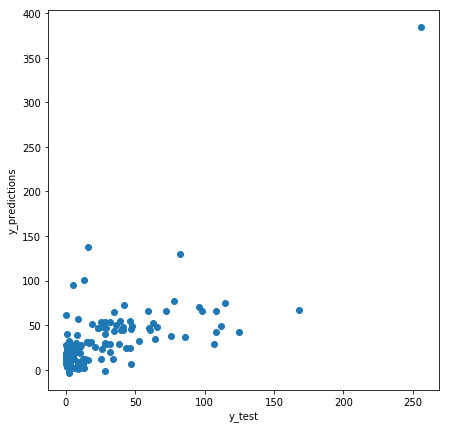

In [50]:
y_predict_linear = lr.predict(X_test)
# y_predict_linear
plt.scatter(y_test, y_predict_linear)
plt.xlabel('y_test')
plt.ylabel('y_predictions')

 # Bayesian Statistical Learning/ Bayesian regression

In this section I apply Bayesian Linear regression. Unlike frequentist methods such as the standard Linear Regression Bayesian regression assumes a prior probability distribution for the parameters. By sampling from the Posterior distribution P(parameters | Data) statistical mean/mode for the parameters can be obtained using MCMC sampling.

In [51]:
test_df = pd.read_excel('test_data.xlsx') #  Assign the excel data to test_df
test_df

,channel_id,video_id,published_at,conversions,views,conversion_rate,subscribers,median_past_views,median_past_views_per_subscriber,median_past_comments,median_past_comments_per_view,median_past_likes_per_dislike,median_past_likes_per_view,average_retention
0,channel_0,video_0,2019-09-28 13:00:00+00:00,64,242887,2.635011e-04,176000,243186.5,1.381741,623.0,0.002165,30.125136,0.026371,1.406284
1,channel_0,video_1,2020-03-07 14:00:10+00:00,35,135413,2.584759e-04,176000,81016.5,0.460321,402.0,0.003693,29.574542,0.038801,1.406284
2,channel_1,video_2,2019-07-26 14:00:00+00:00,41,94210,4.352086e-04,497000,890437.5,1.791625,1969.5,0.002393,28.074815,0.026864,1.259188
3,channel_2,video_3,2019-07-31 07:00:02+00:00,38,69479,5.469422e-04,348000,98262.5,0.282364,275.0,0.004391,22.723902,0.025438,1.295581
4,channel_3,video_4,2020-01-10 16:59:26+00:00,1,96465,1.037682e-05,353000,110008.0,0.311637,660.5,0.006008,40.354157,0.036893,1.175611
5,channel_4,video_5,2020-01-13 16:23:43+00:00,6,140190,4.280619e-05,123000,75178.5,0.611207,610.5,0.008723,32.774610,0.043812,1.404036
6,channel_4,video_6,2020-07-13 15:06:08+00:00,8,218400,3.663462e-05,123000,42981.5,0.349443,779.5,0.011143,28.295493,0.047168,1.404036
7,channel_4,video_7,2020-10-22 11:45:40+00:00,2,48597,4.117538e-05,123000,78450.0,0.637805,822.5,0.009200,32.668401,0.054608,1.404036
8,channel_5,video_8,2019-12-17 19:30:02+00:00,4,178352,2.243317e-05,936000,584831.0,0.624819,3040.5,0.004696,44.070998,0.052767,1.086402
9,channel_6,video_9,2020-10-09 14:21:52+00:00,29,34014,8.526195e-04,542000,20658.5,0.038115,129.5,0.005008,94.056818,0.058250,1.258805


In [52]:
X = np.ones(( np.size(test_df,0) , 9)) # initialize a matrix of feataures

In [53]:
# Each column of the matrix corresponds to a given feature.

X[:,1] = test_df['subscribers'] 
X[:,2] = test_df['median_past_views']
X[:,3] = test_df['median_past_views_per_subscriber']
X[:,4] = test_df['median_past_comments']
X[:,5] = test_df['median_past_comments_per_view']
X[:,6] = test_df['median_past_likes_per_dislike']
X[:,7] = test_df['median_past_comments_per_view']
X[:,8] = test_df['average_retention']
# X

In [54]:
y = test_df['conversions'] # Assign y to to be the conversions that are being predicted.

In [55]:
NumRegressors = np.size(X,1) # 

In [56]:
# Split your data to training and test set.

m = np.size(X,0) 
P = 0.7 # training set data is approximately ~70% of the data.
idx = np.random.permutation(m) # random set of measurements chosen

X_train = X[idx[0: round(P*m)], :] # allocate ~70% of the data to training set
y_train = y[idx[0: round(P*m)]]

X_test = X[idx[round(P*m): ], :] # allocate the remainder as test set.
y_test = y[idx[round(P*m): ]]

Here we define some of the functions to used later on. 

In [57]:
# Bayesian regression with Python's in built function to sample from the posterior multlivarate normal distribution. 

def Bayesian_regression_inbuiltFunc(X, y, small_sigma_squared, eta_squared, numsamples):
    
    # beta is vector of regressors
    # P(beta|D) ~ N(beta| mu, lambda)
    # mu = lambda * X{transpose} * big_sigma^(-1) * Y
    # lambda = (X{transpose} * inv(sigma) * X + inv(big_omega))^{-1}
    # $P(\beta|D) \sim N(\beta| \mu, \lambda)$ % posterior distribution.
    # $\mu = \Lambda * X^{T} * \Sigma^{-1} * Y$ % mean vector of mutivariate posterior
    # $\Lambda = (X^{T} * \Sigma^{-1} * X + \Omega^{-1})^{-1}$ % covariance matrix of posterior
    
    NumMeasurements = np.size(X,0)
    NumRegressors   = np.size(X,1)
    
    big_sigma = small_sigma_squared*np.eye(NumMeasurements)
    big_omega = eta_squared*np.eye(NumRegressors)
    
    #The Mean and covariance matrix of the posterior: P(beta|D) = N(beta|mu,Lambda)
    
    Lambda =  np.linalg.inv( multi_dot([np.transpose(X), np.linalg.inv(big_sigma), X]) + np.linalg.inv(big_omega) )
    mu = multi_dot([Lambda, np.transpose(X), np.linalg.inv(big_sigma), y])
    
    # Draw samples from the posterior distribution using python's inbuilt function
    
    w_vector = np.zeros((numsamples,NumRegressors))
    
    for i in range(0, numsamples, 1):
        
        w_vector[i,:] = np.random.multivariate_normal(mu,Lambda)
        
    return w_vector, mu, Lambda
        
    

In [58]:
# Returns the pdf of the mutivariate normal distribution.

def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

#print( multivariate_normal(np.array([1,0]),2,np.array([0,0]),[[1,0],[0,1]]) )

# Returns the pdf of the univariate normal distribution.

def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

In [59]:
def sample_from_proposal_density(mu, sigma, step_size, w_current):
    
    # sample from the vicinity of the current value
    a = w_current - step_size
    b = w_current + step_size
    
    w_propose = np.random.uniform(a,b)
    r = univariate_normal(w_propose, mu, sigma**2)/univariate_normal(w_current, mu, sigma**2)
    
    P = min(1,r)   
    u = np.random.uniform(0,1)
    
    if u <= P:
        w_current = w_propose
        
    return w_current

In [60]:
# Bayesian regression using MCMC to sample from the posterior multivriate normal distribution.

def Bayesian_regression_with_MH(X_train, y_train, MCMCsteps):
    
    # beta is vector of regressors
    # P(beta|D) ~ N(beta| mu, lambda)
    # mu = lambda * X{transpose} * big_sigma^(-1) * Y
    # lambda = (X{transpose} * inv(sigma) * X + inv(big_omega))^{-1}
    # $P(\beta|D) \sim N(\beta| \mu, \lambda)$ % posterior distribution.
    # $\mu = \Lambda * X^{T} * \Sigma^{-1} * Y$ % mean vector of mutivariate posterior
    # $\Lambda = (X^{T} * \Sigma^{-1} * X + \Omega^{-1})^{-1}$ % covariance matrix of posterior
    
    NumMeasurements = np.size(X_train,0)
    NumRegressors   = np.size(X_train,1)

    small_sigma_squared = 0.01
    eta_squared = 0.01
    
    big_sigma = small_sigma_squared*np.eye(NumMeasurements)
    big_omega = eta_squared*np.eye(NumRegressors)

    #The Mean and covariance matrix of the posterior: P(beta|D) = N(beta|mu,Lambda)   
    Lambda =  np.linalg.inv( multi_dot([np.transpose(X_train), np.linalg.inv(big_sigma), X_train]) + np.linalg.inv(big_omega) )
    mu = multi_dot([Lambda, np.transpose(X_train), np.linalg.inv(big_sigma), y_train])



    sigma_factor = 15
    w_current = [1]*NumRegressors
    q_ij = [1]*NumRegressors
    
    # initialize values of parameters. 
    for k in range(0, NumRegressors,1):
        
        # randomly initialize each parameter normally distibuted around its respective mean. 
        
        w_current[k] = sample_from_proposal_density(mu[k], sigma_factor*Lambda[k,k], sigma_factor*Lambda[k,k], mu[k])    
        #w_current[k] = np.random.normal(mu[k], sigma_factor*Lambda[k,k]) # lazy option. not always available.
            
        q_ij[k] = univariate_normal(w_current[k], mu[k], sigma_factor*Lambda[k,k]) # proposal PDF in the forward direction
        
    w_vector = np.zeros((MCMC_steps+1,NumRegressors))
    w_vector[0,:] = w_current
    
    accept_freq = 0
    
    for i in range(0,MCMC_steps,1):
        
        w_propose = [1]*NumRegressors
        q_ji = [1]*NumRegressors
        
        for k in range(0,NumRegressors,1):
            
            # sample from univariate distribution normally distributed around its previous value
            
            w_propose[k] = sample_from_proposal_density(w_current[k], sigma_factor*Lambda[k,k], sigma_factor*Lambda[k,k], w_current[k])
#             w_propose[k] = np.random.normal(w_current[k], sigma_factor*Lambda[k,k]) # lazy option, again not always available for a problem at hand.
            
            q_ji[k] = univariate_normal(w_propose[k], mu[k], sigma_factor*Lambda[k,k]) # backward proposal PDF
            
        r = (multivariate_normal(np.array(w_propose), NumRegressors, np.array(mu), Lambda))/(multivariate_normal(np.array(w_current), NumRegressors, np.array(mu), Lambda))
        r = ( np.prod(q_ji)/np.prod(q_ij) )*r # multiplied by the ratio of proposal PDF's. 
        
        P = min(1,r)
        u = np.random.uniform(0,1)
        
        if u <= P:
            w_current = w_propose
            accept_freq = accept_freq + 1
            q_ij = q_ji
        
        w_vector[i+1] = w_current
        
    acceptance_ratio = accept_freq/MCMC_steps
    
    return w_vector, acceptance_ratio, mu, Lambda


# Perform Bayesian Regression

In [61]:
# This is the main cell to use when retriveing the estimated parameter values of the linear model.

small_sigma_squared = 0.01
eta_squared = 0.01
MCMC_steps = 10**5

# Commment out the tenchnique you dont wish to use.

# Lazy inbuilt function. This was created as a baseline comparison. i.e. to chekcc if MCMC had been implemeted correctly.
# This inbuiltFunc is not always available especially when the posterior at hand is an unusual distribution.


# w_vector, mu, Lambda = Bayesian_regression_inbuiltFunc(X_train, y_train, small_sigma_squared, eta_squared, MCMC_steps)
w_vector, acceptance_ratio, mu, Lambda = Bayesian_regression_with_MH(X_train, y_train, MCMC_steps) # Explicit MCMC. 


# Obtain mean from posterior. i.e. take the mean over the range of parameter values obtained from MCMC chain.
mean_w = [1]*NumRegressors

for i  in range(0,NumRegressors, 1):
    
    mean_w[i] = np.mean(w_vector[:,i])
    
print(mean_w)



[-43.13744023915289, -1.1801789198001516e-06, 0.0001379687866525141, -16.79035387937292, -0.0158986292543842, -3.1149277340392474, -0.08337113812822569, -3.1158399284174356, 50.89207052573168]


In [62]:
print('Metropolis-Hastings acceptance ratio:')
print(acceptance_ratio)

Metropolis-Hastings acceptance ratio:
0.46006


 Plot the distribution of the parameters

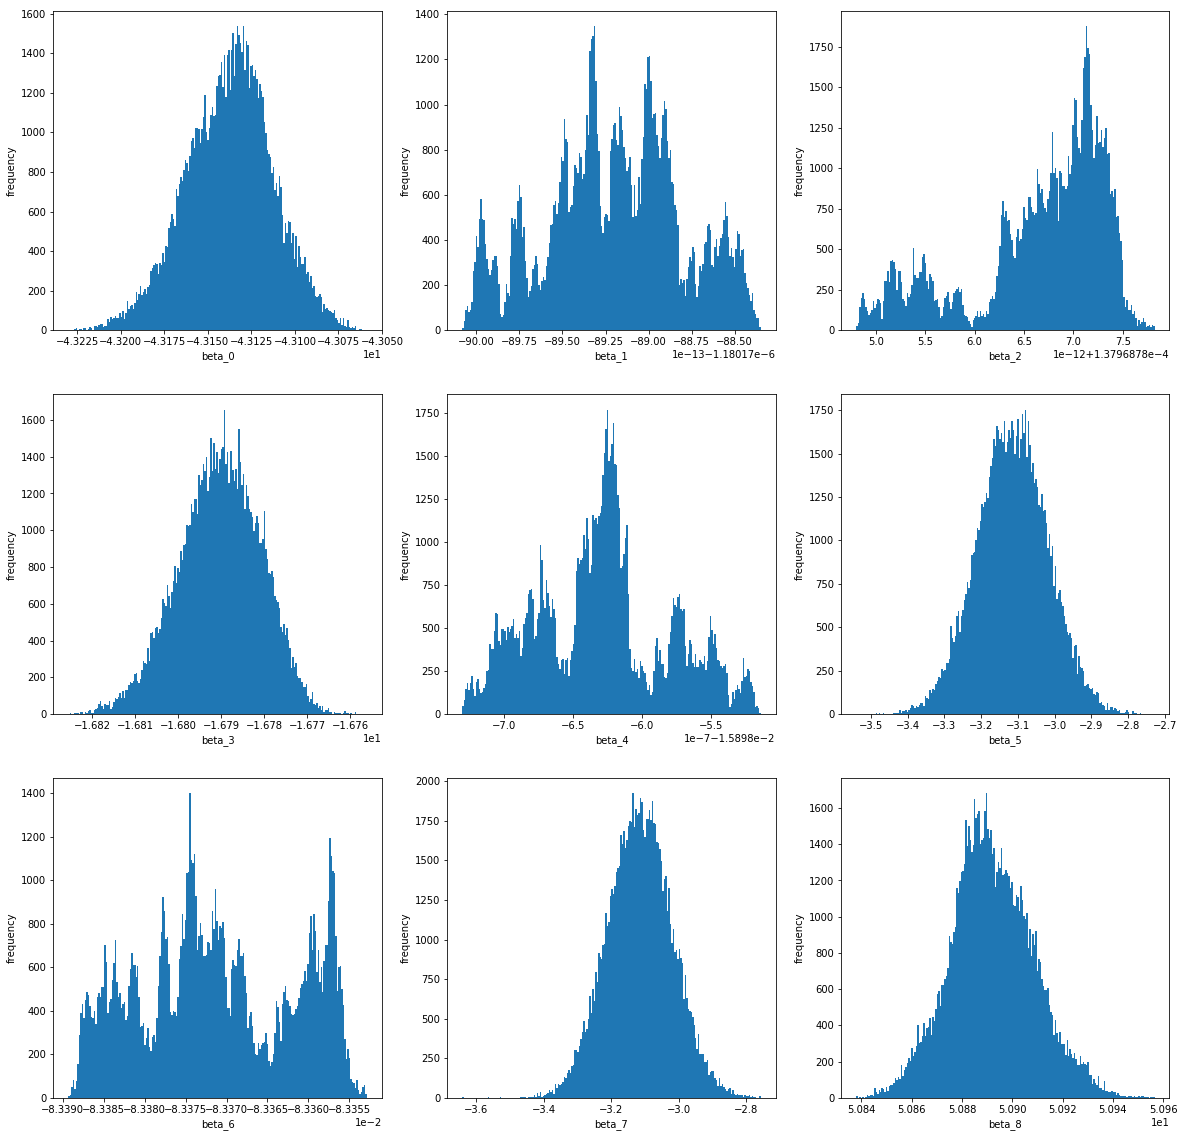

In [64]:
for i in range(1,NumRegressors+1,1):
    
    plt.subplot(3,3,i)
    plt.hist(w_vector[:,i-1], bins = 200)
    
    plt.xlabel('beta_'+ str(i-1))
    plt.ylabel('frequency')
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.rcParams["figure.figsize"]=20,20


Plot the traceplot of each parameter obtained from MCMC.

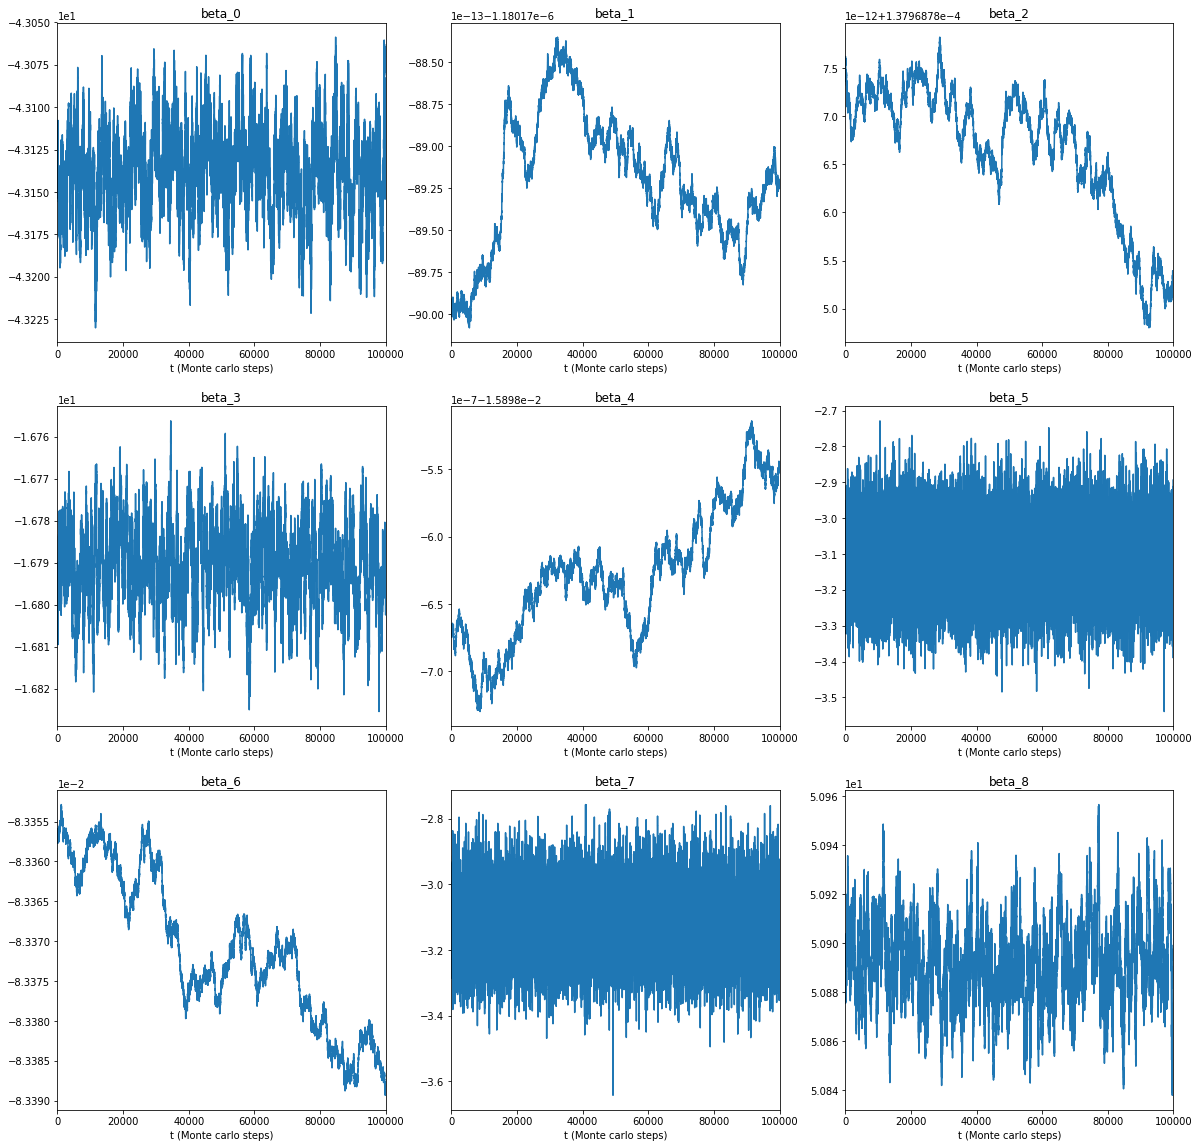

In [65]:
for i in range(1,NumRegressors+1,1):
    
    plt.subplot(3,3,i)
    plt.plot(w_vector[:,i-1])
    plt.xlim([0, 10**5])
    
    plt.xlabel('t (Monte carlo steps)')
   # plt.ylabel('beta_' + str(i-1))
    plt.title('beta_' + str(i-1))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
   # plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.rcParams["figure.figsize"]=15,15

We can see which chains that are not mixing well. For these chains the proposal might not be ideal. This is the curse of dimentionality, i.e. when sampling from a mutivariate probability distribution. It is difficult to find a proposal that is optimum for all dimensions.

Define a function to compute the integrated autocorrelation times (IAC) of the parameters. Large autocorrelation times means the effective sample size from MCMC is small, i.e. the number of uncorrelated samples generated is small for large IAC. we wish the IAC to be small. IAC is also directly related to the aympttic variance on the parameters being estimated. We can see that chians that are not mixing well will have large IAC values. Rule of thumb: We must aim for small IAC in order to increase effective sample size and reduce the variance on the estimates. In this case the estimates are the model parameters.  


In [66]:
def compute_IAC(autocorrelation):
    
    def first_neg(list): # function to locate the index of the first negative value in the autocrrelation vector.
        count = 0
        for number in list:
            count += 1      #moved it outside of the if
            if number < 0:
                return count - 1
    
    R = first_neg(autocorrelation)
    
    if R == None: # if the autocorr vector is all positive then the sum is taken up to the minimum value.
        
        R = autocorrelation.index(min(autocorrelation))
        Sum_corr = np.sum(autocorrelation[0:R+1])
    else:
        
        Sum_corr = np.sum(autocorrelation[0:R])
        
    IAC = 1 + 2.*Sum_corr # defintion of integrated autocorrelation function.
    
    return IAC
        
        

 Retrive the intgerated autocorrelation times and plot the autocorrelation functions on the parameters obtained from MCMC sampling.

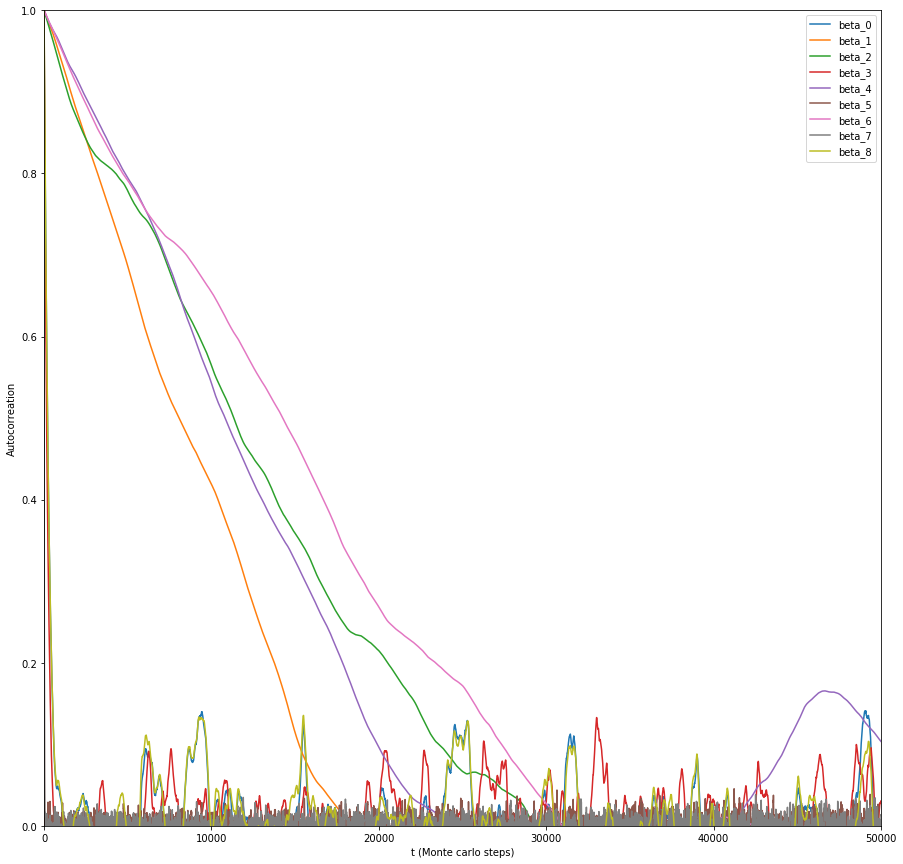

In [67]:
def autocorr(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

IAC = [1]*NumRegressors
for i in range(0,NumRegressors,1):
    
    corr = autocorr(w_vector[:,i])
    IAC[i] = compute_IAC(corr)
    
    # plt.subplot(3,3,i)
    plt.plot(corr, label= 'beta_' + str(i))
   
    
    
plt.xlabel('t (Monte carlo steps)')
plt.ylabel('Autocorreation')
plt.rcParams["figure.figsize"]=7,7
plt.xlim([0, 5*10**4])
plt.ylim([0,1])
plt.legend()



We can see that chains that are not mixing well (tracelots above) have correspondingly slow relaxing dynamics (the autocorrelation functions decay slowly to zero.). Crudely speaking the point where the function hits zero gives you an indication of how long one must wait (in units of MCMC steps) before genetaing an independet sample. Rule of thumb: We wish for autocorrelation functions that decay to zero fast.

In [36]:
print('The integerated autocorrelation times on the parameters:')
print(np.round(IAC))
print('Effective sample size')
for i in range(0,NumRegressors,1):
    print(w_vector[0 :: int( round(2*IAC[i]) ) , 0].shape) # i.e. every 2*IAC'th data point is decorrelated from previous values.

The integerated autocorrelation times on the parameters:
[5.7700e+02 2.9932e+04 3.5174e+04 3.2000e+02 2.3196e+04 1.7000e+01
 2.8373e+04 1.8000e+01 6.2900e+02]
Effective sample size
(87,)
(2,)
(2,)
(157,)
(3,)
(2858,)
(2,)
(2858,)
(80,)


We can see that the chains corresponding to beta_1, beta_2, beta_4 and beta_6 that are not mixing well (see traceplots above) have correspondingly large IAC values and consequently small effective sample size.

Using the IAC values. obtain the mean values using the effective sample size ~ N/(2xIAC). In order to do any statistics involving indepenedlty samples values, we have to ensure that all our samples are decorrelated. We do this by retriveing every ~ N/(2xIAC) sample from the MCMC chain. N is the total number of samples.

In [37]:
mean_w_eff = [1]*NumRegressors
for i  in range(0,NumRegressors,1):
    
    mean_w_eff[i] = np.mean(w_vector[0 :: int( round(2*IAC[i]) ) , i] ) # mean values of each parameter obtained using the effctive sample size.
    
print(mean_w_eff)

[-53.80385566847009, 7.509971549229448e-06, 0.00010521980592617704, -1.4569368933637252, -0.01590509892470532, -4.293783069473969, -0.09748872166373727, -4.290216203501434, 55.19548445129677]


These mean estimates have now been obtained using effectively independent samples as opposed to before. In practice these are the final values that must be retained.

Predict using the Training set data. Compute the R^2.

In [38]:
y_predict_train = multi_dot([X_train, np.transpose(mean_w_eff)])
correlation_matrix = np.corrcoef(y_train, y_predict_train)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2


print('Training test score')
print(r_squared)



Training test score
0.5214185149266223


 Predict using the test set data

In [39]:
y_predict_test = multi_dot([X_test, np.transpose(mean_w_eff)])
correlation_matrix = np.corrcoef(y_test, y_predict_test)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print('Test set score:')
print(r_squared)



Test set score:
0.48382539508353084


Plot y_train/y_test vs y_predict

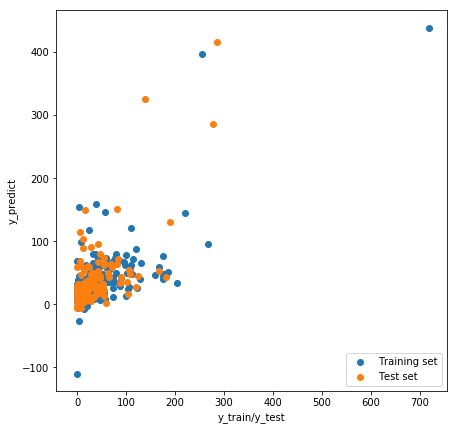

In [40]:
plt.figure
plt.scatter(y_train,y_predict_train, label = 'Training set')
plt.scatter(y_test,y_predict_test, label = 'Test set')
plt.xlabel('y_train/y_test')
plt.ylabel('y_predict')
plt.legend(loc=4)

Advantages of Bayesian Statistical leanrning:
 - Allows one to easily retrive a confidence boudn on the prediction. Since the parameter estimates and therfore the prediction is a distribtuion.
 - By Bayesian inference one recovers a whole range of inferential solutions rather than a fixed point as in frquentists statistics as in Linear regression.
 - It is particlualy well suited for an online approach since more data can be readily incorporate on the fly without needing to store all previous data.
 - Tends to work better than frequentist approach when working with little data.

Disadvatages of Bayesian Statistical Learning
- Finding a suitable prior can  be difficult (However for most Linear regression problems Gausssian prior works very well).
- Involves MCMC which must only be a last resort for numerical methods, Since it can be diffult to impement when sampling from unsual Posterior distributions for which there exist no inbuilt functions.
- Sampling from the posterior can be tedious if the posterior distribution is an unusual one and mutivariate. The converegnce of the parameters can be slow and may suffer from the curse of dimensionality with large number of features. Particularly so with the Metroplis-Hastings Algorithm. Although other sophisticated sampling algorithms exist when sampling from multidimensional distirbutions. 